<a href="https://colab.research.google.com/github/Linkonb/Employee_Turnover_Prediction/blob/main/Employee_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('BDS')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle

BDS


In [ ]:
age_ranges = [(18, 24), (25, 29),(30, 34), (35, 40), (43, 55), (56, 64), (65, 80)]
# Create a function to categorize ages into the specified age ranges
def categorize_age(age):
    for min_age, max_age in age_ranges:
        if min_age <= age <= max_age:
            return f"{max_age}-{min_age}"
    return "80+"



Current_Gross_ranges = [(0, 10000), (10001, 12000),(12001, 15000), (15001, 18000), (18001, 21000), (21001, 24000), (24001, 27000)]
# Create a function to categorize ages into the specified age ranges
def categorize_Gross_ranges(Current_Gross):
    for min_ranges, max_ranges in Current_Gross_ranges:
        if min_ranges <= Current_Gross <= max_ranges:
            return f"{max_ranges}-{min_ranges}"
    return "27001"


# Use a conditional check to handle invalid date values
def safe_date_conversion(date_str):
    try:
        return pd.to_datetime(date_str, format=left_date_format)
    except ValueError:
        return np.nan


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emp_model_data.csv', low_memory=False, encoding='cp1252')
 #emp_model_data_Year1

In [ ]:
print(data.head())
print('Total data:',data['Department'].count())

   RegId  ComID EmployeeCode                 Name       BirthDate  \
0   1821      1        10795  PARVIN AKTER FATEMA   2/3/1989 0:00   
1   1822      1        10796         LABONI BEGUM  6/13/1992 0:00   
2   1836      1        10809           MALA AKTER  8/18/1992 0:00   
3   1841      1        10813         NASIMA AKTER   3/1/1992 0:00   
4   1858      1        10829               RAHIMA   3/1/1991 0:00   

       JoiningDate Department    Section  Designation Bus_Availer  ...  \
0   6/14/2011 0:00     SEWING  SEWING 01     OPERATOR          No  ...   
1   6/16/2011 0:00     SEWING  SEWING 01       HELPER          No  ...   
2   9/25/2011 0:00     SEWING  SEWING 01       HELPER          No  ...   
3   10/3/2011 0:00     SEWING  SEWING 01  JR.OPERATOR          No  ...   
4  11/15/2011 0:00     SEWING  SEWING 01       HELPER          No  ...   

  Current_Gross   District     Sex MLeft        Left_Date WStatus JoinYear  \
0          5300  PIROJPUR   Female     1  10/11/2011 0:00     

In [ ]:
# Define a custom date parsing format for the 'LeftDate' column
left_date_format = '%m/%d/%Y'  # Replace with your actual date format

data['JoiningDate'] = data['JoiningDate'].apply(safe_date_conversion)

In [ ]:
#filtered_df = df.query('age > 25 and gender == 'Male'')
#data= data.query('ComID == 7 and WStatus == "F" and WorkingDuration >0 and Corporate_Emp=="Yes" and WStatus  in ("W","F")')

#data= data.query('ComID == 7 and WStatus == "J"  ')
#data= data.query('Department == "SEWING" and WStatus == "W" ')
#data= data.query('ComID == 7 and JoiningDate. >= '01-01-2015'' )
# df.country.isin(countries_to_keep)  and Department == "SEWING"

data= data.query('MLeft == 1')

#data= data.query(' ComID  in (1,5,7)   and Department == "SEWING2" and  WorkingDuration > 1 ')
#data= data.query(' ComID  in (1,5,7)   and  WorkingDuration > 1 ')

data = data[['RegId','ComID','Department','Section','Designation','Designation_Category','Current_Gross','District','Sex','Marital_Status','Last_Education','Bus_Availer','MLeft','Left_Date','WStatus','JoinYear','AgeWhenLeft','WorkingDuration','WorkingDurationYear']]



print('Filter data:',data['Department'].count())
#print(data.head())


#if data['Department'].count() == 0 :
    ##sys.exit(0)
# Apply the categorize_age function to create an 'AgeRange' column
#data['JoinYear'] = data['JoinYear'].apply(categorize_age)
#data['Current_Gross'] = data['Current_Gross'].apply(categorize_Gross_ranges)



Filter data: 246959


<ipython-input-82-05b44a6e5a65>:30: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
<ipython-input-82-05b44a6e5a65>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


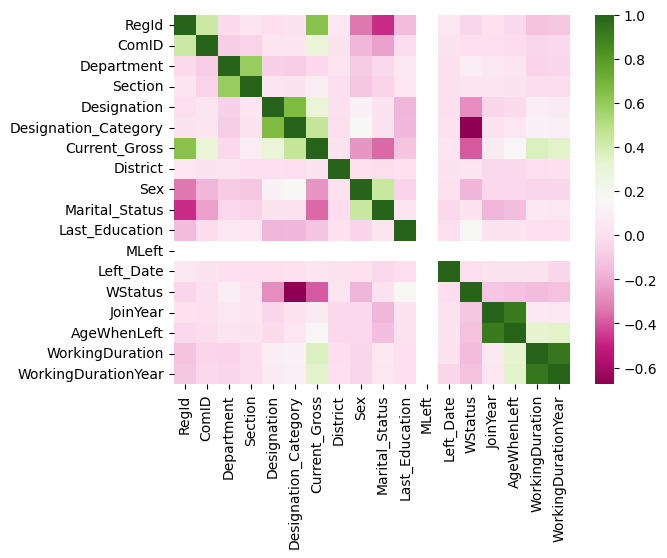

In [ ]:
# Preform label encoding for gender variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lableencoder_X_2 = LabelEncoder()



data['Department'] = lableencoder_X_2.fit_transform(data['Department'])
data['Section'] = lableencoder_X_2.fit_transform(data['Section'])
data['Designation'] = lableencoder_X_2.fit_transform(data['Designation'])
data['Designation_Category'] = lableencoder_X_2.fit_transform(data['Designation_Category'])
data['Current_Gross'] = lableencoder_X_2.fit_transform(data['Current_Gross'])



data['District'] = lableencoder_X_2.fit_transform(data['District'])
data['Sex'] = lableencoder_X_2.fit_transform(data['Sex'])
data['Marital_Status'] = lableencoder_X_2.fit_transform(data['Marital_Status'])
data['Last_Education'] = lableencoder_X_2.fit_transform(data['Last_Education'])
data['MLeft'] = lableencoder_X_2.fit_transform(data['MLeft'])
data['Left_Date'] = lableencoder_X_2.fit_transform(data['Left_Date'])


data['WStatus'] = lableencoder_X_2.fit_transform(data['WStatus'])
data['JoinYear'] = lableencoder_X_2.fit_transform(data['JoinYear'])
data['AgeWhenLeft'] = lableencoder_X_2.fit_transform(data['AgeWhenLeft'])
data['WorkingDuration'] = lableencoder_X_2.fit_transform(data['WorkingDuration'])
data['WorkingDurationYear'] = lableencoder_X_2.fit_transform(data['WorkingDurationYear'])


data.fillna(data.mean(), inplace=True)


#Correlation Matrix
corr = data.corr()
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="PiYG")
#print(corr)
plt.show()



#print(data[['MLeft', 'AgeWhenLeft']].groupby(['MLeft'], as_index=False).mean().sort_values(by='AgeWhenLeft', ascending=False))
##print(data[['MLeft', 'Department']].groupby(['MLeft'], as_index=False).mean().sort_values(by='Department', ascending=False))

#print(data[['MLeft', 'Department']].groupby(['Department'], as_index=False).mean().sort_values(by='MLeft', ascending=False))





#print(data.count())

# Select independent variables (features) and target attribute
#x = data[['Department', 'Section', 'Sex', 'AgeWhenLeft', 'WStatus']]  WorkingDuration Designation District	BloodGroup JoinYear


#x = data[['Department', 'Section']]  #Mean Squared Error: 4.271169441649926 R-squared (R2) Score: 0.044655098848032204
#x = data[['Sex']]  # R-squared (R2) Score: 3.967209345245859e-05

#x = data[['ComID','Department','Section','Designation','Designation_Category','Last_Education','WStatus','Sex','Marital_Status','Bus_Availer','JoinYear' ,'AgeWhenLeft','WorkingDuration','Current_Gross'] ]  #33

#x = data[['ComID','Department','Section','Designation_Category','WStatus','Sex','Marital_Status','JoinYear' ,'AgeWhenLeft','Current_Gross'] ]  #33
#y = data['WorkingDuration']  #86.50%


x = data[['RegId','ComID','Department','Section','Designation_Category','WStatus','Sex','Marital_Status','AgeWhenLeft' ,'Current_Gross'] ]  #33
y = data['WorkingDuration']
# WorkingDuration WorkingDurationYear



#ica = FastICA(n_components=4)
#x  = ica.fit_transform(x)

#sc = StandardScaler()
#x  =sc.fit(x)




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)



## load the model from disk
#filename = 'finalized_model.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#y_pred = loaded_model.predict(X_test)

#pass

# Create a decision tree regressor model
model = DecisionTreeRegressor(random_state=10)
#model = DecisionTreeClassifier(random_state=0)


# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


#cm= confusion_matrix(y_test, y_pred)
#print(cm)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))



In [ ]:

#print(y_pred.count())
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')




# some time later...

 # load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
y_pred = model.predict(X_test)
print(result)

Mean Squared Error: 59.377561102022966
R-squared (R2) Score: 0.8092691361677662
0.8092691361677662


In [ ]:
print(y_test.iloc[20001:20010])
#print(y_test.query('RegId == "114652" '))
#print(X_test.iloc[:2])
y_pred = model.predict(X_test.iloc[20001:20010])
print(y_pred)

126276    136
175488    122
7043      130
216729    122
151057    129
21352     125
88666     195
103673    126
57986     128
Name: WorkingDuration, dtype: int64
[139. 123. 127. 129. 125. 125. 191. 124. 131.]


In [ ]:

#test data

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emp_model_data_test.csv', low_memory=False, encoding='cp1252')
 #emp_model_data_Year1


data['JoiningDate'] = data['JoiningDate'].apply(safe_date_conversion)
data = data[['RegId','ComID','Department','Section','Designation','Designation_Category','Current_Gross','District','Sex','Marital_Status','Last_Education','Bus_Availer','MLeft','Left_Date','WStatus','JoinYear','AgeWhenLeft','WorkingDuration','WorkingDurationYear']]


# Preform label encoding for gender variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lableencoder_X_2 = LabelEncoder()



data['Department'] = lableencoder_X_2.fit_transform(data['Department'])
data['Section'] = lableencoder_X_2.fit_transform(data['Section'])
data['Designation'] = lableencoder_X_2.fit_transform(data['Designation'])
data['Designation_Category'] = lableencoder_X_2.fit_transform(data['Designation_Category'])
data['Current_Gross'] = lableencoder_X_2.fit_transform(data['Current_Gross'])



data['District'] = lableencoder_X_2.fit_transform(data['District'])
data['Sex'] = lableencoder_X_2.fit_transform(data['Sex'])
data['Marital_Status'] = lableencoder_X_2.fit_transform(data['Marital_Status'])
data['Last_Education'] = lableencoder_X_2.fit_transform(data['Last_Education'])
data['MLeft'] = lableencoder_X_2.fit_transform(data['MLeft'])
data['Left_Date'] = lableencoder_X_2.fit_transform(data['Left_Date'])


data['WStatus'] = lableencoder_X_2.fit_transform(data['WStatus'])
data['JoinYear'] = lableencoder_X_2.fit_transform(data['JoinYear'])
data['AgeWhenLeft'] = lableencoder_X_2.fit_transform(data['AgeWhenLeft'])
data['WorkingDuration'] = lableencoder_X_2.fit_transform(data['WorkingDuration'])
data['WorkingDurationYear'] = lableencoder_X_2.fit_transform(data['WorkingDurationYear'])


data.fillna(data.mean(), inplace=True)


<ipython-input-68-c2e118d324e3>:38: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:

x = data[['RegId','ComID','Department','Section','Designation_Category','WStatus','Sex','Marital_Status','AgeWhenLeft' ,'Current_Gross'] ]  #33
y = data['WorkingDuration']

print(x)
y_pred = model.predict(x)
print(y_pred)

     RegId  ComID  Department  Section  Designation_Category  WStatus  Sex  \
0   105562      7           2        0                     2        0    1   
1   105513      7           2        0                     6        0    1   
2   105794      1           1        0                     0        1    1   
3   105810      7           2        0                     5        0    1   
4   114654      1           1        0                     1        1    0   
5   114652      1           1        0                     1        1    1   
6   114638      7           2        0                     0        1    1   
7   114637      7           2        0                     0        1    1   
8   114639      1           1        0                     4        1    0   
9   159438      7           2        0                     0        1    1   
10  159424      1           2        0                     1        1    1   
11  176123      1           0        0                     4    